#### Krok 1: Przygotowanie środowiska pracy

In [61]:
# Przygotowanie środowiska pracy
# pip install pandas numpy matplotlib

In [62]:
# Importujemy potrzebne biblioteki
import pandas as pd  # pandas to biblioteka do manipulacji danymi w formie tabelarycznej
import numpy as np  # numpy to biblioteka do pracy z tablicami numerycznymi
import matplotlib.pyplot as plt  # matplotlib służy do wizualizacji danych
import seaborn as sns  # seaborn to biblioteka do zaawansowanych wizualizacji opartych na matplotlib


In [63]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('Human Age Prediction Synthetic Dataset.csv')

# Wyświetlenie podstawowych informacji o danych:
print(df.info())  # Pokazuje informacje o strukturze danych, kolumnach i brakujących wartościach
print(df.describe())  # Wyświetla podstawowe statystyki opisowe dla zmiennych numerycznych
print(df.head())  # Wyświetla pierwsze pięć wierszy z danych, aby zapoznać się z ich strukturą


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

#### Krok 2: Eksploracyjna analiza danych (EDA)

Średnia: 53.48566666666667, Mediana: 53.0, Dominanta: 37, Odchylenie standardowe: 20.56969045166491


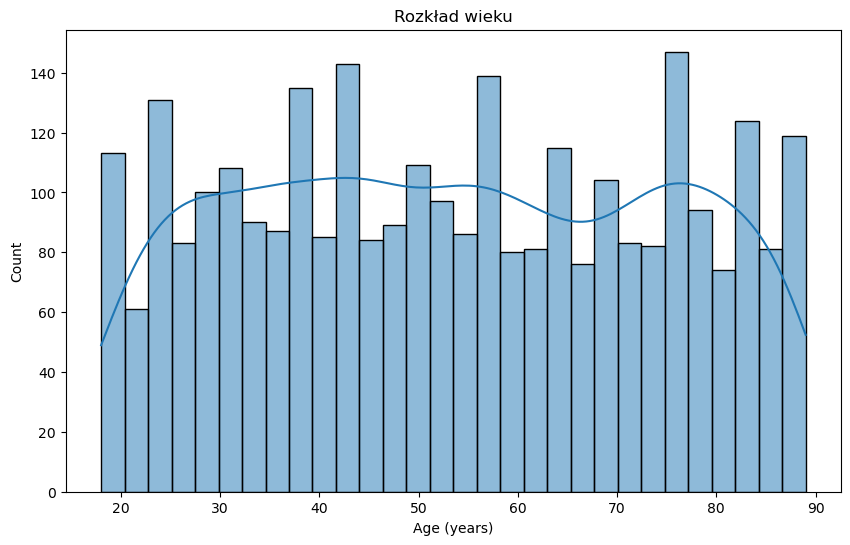

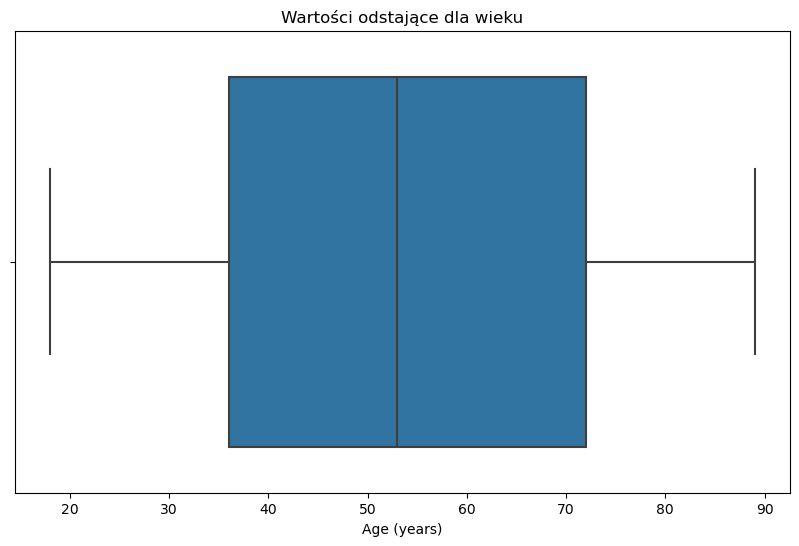

In [65]:
# Obliczamy podstawowe statystyki dotyczące wieku (średnia, mediana, dominanta i odchylenie standardowe)
mean_age = df['Age (years)'].mean()  # Obliczenie średniej wieku
median_age = df['Age (years)'].median()  # Obliczenie mediany wieku
mode_age = df['Age (years)'].mode()[0]  # Dominanta wieku, czyli najczęściej występująca wartość
std_age = df['Age (years)'].std()  # Obliczenie odchylenia standardowego wieku

print(f'Średnia: {mean_age}, Mediana: {median_age}, Dominanta: {mode_age}, Odchylenie standardowe: {std_age}')

# Wizualizacja rozkładu wieku za pomocą histogramu
plt.figure(figsize=(10, 6))  # Ustawienie rozmiaru wykresu
sns.histplot(df['Age (years)'], bins=30, kde=True)  # Histogram z rozkładem wieku i krzywą gęstości
plt.title('Rozkład wieku') # Tytuł wykresu
plt.show() # Pokaż wykres
 
# Tworzenie wykresu pudełkowego (boxplot) w celu identyfikacji wartości odstających
plt.figure(figsize=(10, 6))  # Ustawienie rozmiaru wykresu na 10x6 cali
sns.boxplot(x=df['Age (years)'])  # Tworzenie wykresu pudełkowego dla kolumny 'Age (years)'
plt.title('Wartości odstające dla wieku')  # Dodanie tytułu wykresu
plt.show()  # Wyświetlenie wykresu


#### Wnioski

#### Krok 3: Czyszczenie danych

In [68]:
# Sprawdzanie brakujących wartości w kolumnach
print(df.isnull().sum())  # Wyświetla liczbę brakujących danych w każdej kolumnie

# Uzupełnianie brakujących wartości średnią w kolumnie 'Age (years)'
df.fillna(df['Age (years)'].mean(), inplace=True)

# Sprawdzanie i usuwanie duplikatów
print(df.duplicated().sum())  # Sprawdzenie liczby duplikatów
df.drop_duplicates(inplace=True)  # Usunięcie zduplikowanych wierszy


Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64
0


#### Krok 4: Zaawansowana analiza statystyczna

In [70]:
# Obliczenie kwartylów i rozstępu międzykwartylowego (IQR) dla zmiennej 'Age (years)'
Q1 = df['Age (years)'].quantile(0.25)  # Pierwszy kwartyl
Q3 = df['Age (years)'].quantile(0.75)  # Trzeci kwartyl
IQR = Q3 - Q1  # Rozstęp międzykwartylowy

print(f'Kwartyl 1: {Q1}, Kwartyl 3: {Q3}, IQR: {IQR}')

# Identyfikacja wartości odstających na podstawie IQR
outliers = df[(df['Age (years)'] < (Q1 - 1.5 * IQR)) | (df['Age (years)'] > (Q3 + 1.5 * IQR))]  # Filtruje wiersze, w których wiek jest mniejszy niż Q1 - 1.5*IQR lub większy niż Q3 + 1.5*IQR (wartości odstające)
print(outliers)  # Wyświetla wiersze, które zostały zidentyfikowane jako wartości odstające


Kwartyl 1: 36.0, Kwartyl 3: 72.0, IQR: 36.0
Empty DataFrame
Columns: [Gender, Height (cm), Weight (kg), Blood Pressure (s/d), Cholesterol Level (mg/dL), BMI, Blood Glucose Level (mg/dL), Bone Density (g/cm²), Vision Sharpness, Hearing Ability (dB), Physical Activity Level, Smoking Status, Alcohol Consumption, Diet, Chronic Diseases, Medication Use, Family History, Cognitive Function, Mental Health Status, Sleep Patterns, Stress Levels, Pollution Exposure, Sun Exposure, Education Level, Income Level, Age (years)]
Index: []

[0 rows x 26 columns]


In [71]:
# Tworzenie grup wiekowych
age_bins = [0, 18, 35, 50, 65, 100]  # Definicja przedziałów wiekowych
labels = ['0-18', '19-35', '36-50', '51-65', '65+']  # Etykiety dla grup wiekowych
df['age_group'] = pd.cut(df['Age (years)'], bins=age_bins, labels=labels)  # Tworzenie nowej kolumny 'age_group'

# Oblicz średnią tylko dla kolumn numerycznych w grupach wiekowych
grouped_data = df.groupby('age_group').mean(numeric_only=True)

# Zaokrąglenie wyników do 2 miejsc po przecinku
grouped_data = grouped_data.round(2)

# Wyświetl zaokrąglone wyniki
print(grouped_data)

           Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)    BMI  \
age_group                                                               
0-18            169.69        70.85                     214.58  24.61   
19-35           168.51        73.19                     219.78  25.78   
36-50           168.38        72.26                     229.60  25.52   
51-65           168.39        71.76                     236.14  25.35   
65+             168.86        72.85                     246.43  25.59   

           Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  \
age_group                                                      
0-18                            115.19                  1.64   
19-35                           116.53                  1.46   
36-50                           123.00                  1.15   
51-65                           127.72                  0.85   
65+                             135.98                  0.44   

           Vision Sharpness  Hearing Ab

#### Wizualizacja

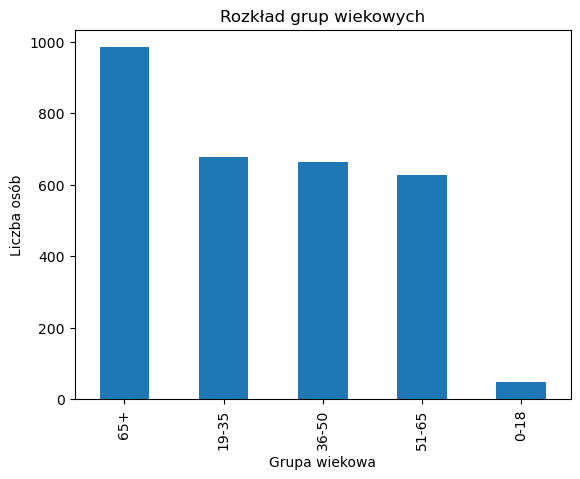

In [73]:
# Wizualizacja podziału na grupy wiekowe

# Wykres słupkowy dla każdej grupy wiekowej:
df['age_group'].value_counts().plot(kind='bar')  # Zlicza liczbę osób w każdej grupie wiekowej i tworzy wykres słupkowy
plt.title('Rozkład grup wiekowych')  # Dodaje tytuł wykresu
plt.xlabel('Grupa wiekowa')  # Ustawia etykietę dla osi X - 'Grupa wiekowa'
plt.ylabel('Liczba osób')  # Ustawia etykietę dla osi Y - 'Liczba osób'
plt.show()  # Wyświetla wykres


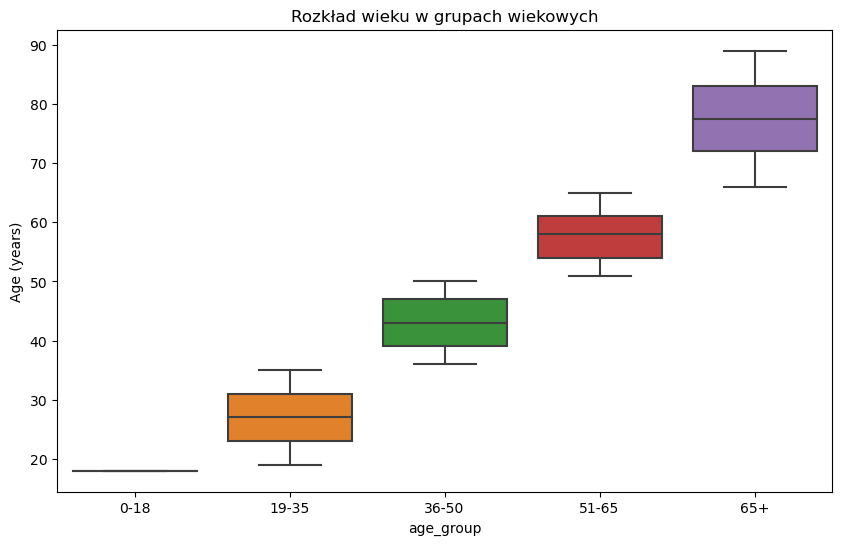

In [74]:
# Porównanie statystyk dla każdej grupy wiekowej

# Wykres pudełkowy dla każdej grupy:
plt.figure(figsize=(10, 6))  # Tworzenie nowej figury o rozmiarze 10x6 cali
sns.boxplot(x='age_group', y='Age (years)', data=df)  # Tworzenie wykresu pudełkowego, który pokazuje rozkład wieku w poszczególnych grupach wiekowych
plt.title('Rozkład wieku w grupach wiekowych')  # Dodanie tytułu wykresu
plt.show()  # Wyświetlenie wykresu


#### Wnioski

#### Dalsza analiza, bardziej szczegółowa

#### Kategoryzacja wskaźnika BMI (BMI Classification):
Wykorzystamy dane o wskaźniku BMI do skategoryzowania osób według tych samych reguł, które stosowałeś w Excelu (np. "Niedowaga", "Prawidłowa waga", "Nadwaga", "Otyłość").

In [77]:
# Stworzenie kolumny BMI Classification

# Funkcja klasyfikująca BMI na podstawie wartości
def classify_bmi(bmi):
    if bmi < 18.5:  # Jeśli BMI jest mniejsze niż 18.5, przypisujemy 'Niedowaga'
        return 'Niedowaga'
    elif 18.5 <= bmi < 25:  # Jeśli BMI jest pomiędzy 18.5 a 25, przypisujemy 'Prawidłowa waga'
        return 'Prawidłowa waga'
    elif 25 <= bmi < 30:  # Jeśli BMI jest pomiędzy 25 a 30, przypisujemy 'Nadwaga'
        return 'Nadwaga'
    else:  # Jeśli BMI jest równe lub większe niż 30, przypisujemy 'Otyłość'
        return 'Otyłość'

# Zakładając, że mamy kolumnę 'BMI' w danych
df['BMI Classification'] = df['BMI'].apply(classify_bmi)  # Tworzenie nowej kolumny 'BMI Classification', używając funkcji classify_bmi

# Wyświetlenie podsumowania kategoryzacji BMI
print(df['BMI Classification'].value_counts())  # Zlicza i wyświetla liczbę osób w każdej kategorii BMI (Niedowaga, Prawidłowa waga, Nadwaga, Otyłość)


BMI Classification
Prawidłowa waga    1261
Nadwaga            1149
Otyłość             459
Niedowaga           131
Name: count, dtype: int64


#### Analiza poziomu cholesterolu i glukozy:
Przeanalizujemy poziomy cholesterolu i glukozy, zidentyfikujemy osoby z wartościami powyżej ustalonych norm i przedstawimy te dane.

In [79]:
# Zidentyfikowanie osób z wysokim poziomem cholesterolu (>240 mg/dL) i glukozy (>125 mg/dL)
high_cholesterol = df[df['Cholesterol Level (mg/dL)'] > 240]  # Filtruje osoby z poziomem cholesterolu powyżej 240 mg/dL
high_glucose = df[df['Blood Glucose Level (mg/dL)'] > 125]  # Filtruje osoby z poziomem glukozy powyżej 125 mg/dL

# Wyświetlenie liczby osób z wysokim poziomem cholesterolu i glukozy
print(f'Liczba osób z wysokim poziomem cholesterolu: {len(high_cholesterol)}')  # Wyświetla liczbę osób z wysokim cholesterolem
print(f'Liczba osób z wysokim poziomem glukozy: {len(high_glucose)}')  # Wyświetla liczbę osób z wysokim poziomem glukozy

# Stworzenie flag dla osób z wysokim poziomem cholesterolu i glukozy
df['High Cholesterol'] = df['Cholesterol Level (mg/dL)'] > 240  # Tworzy nową kolumnę 'High Cholesterol', która zawiera wartość True dla osób z cholesterolem powyżej 240 mg/dL
df['High Glucose'] = df['Blood Glucose Level (mg/dL)'] > 125  # Tworzy nową kolumnę 'High Glucose', która zawiera wartość True dla osób z poziomem glukozy powyżej 125 mg/dL


Liczba osób z wysokim poziomem cholesterolu: 1210
Liczba osób z wysokim poziomem glukozy: 1612


#### Tabele przestawne (pivot tables):


In [81]:
# Tworzenie tabeli przestawnej (średni poziom cholesterolu i glukozy w grupach wiekowych)
pivot_table = df.pivot_table(
    values=['Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)'],  # Kolumny, dla których chcemy obliczyć średnią
    index='age_group',  # Grupowanie na podstawie grup wiekowych (age_group)
    aggfunc='mean'  # Funkcja agregująca - obliczamy średnią dla cholesterolu i glukozy
)
print(pivot_table)  # Wyświetlenie tabeli przestawnej z wynikami

# Możliwość dodania dodatkowych kolumn do tabeli przestawnej
pivot_table = df.pivot_table(
    values=['Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)', 'BMI'],  # Kolumny, dla których chcemy obliczyć średnią
    index='age_group',  # Grupowanie według grup wiekowych (age_group)
    aggfunc={  # Funkcje agregujące dla poszczególnych kolumn
        'Cholesterol Level (mg/dL)': 'mean',  # Średni poziom cholesterolu
        'Blood Glucose Level (mg/dL)': 'mean',  # Średni poziom glukozy
        'BMI': 'mean'  # Średni wskaźnik masy ciała (BMI)
    }
)
print(pivot_table)  # Wyświetlenie tabeli przestawnej z dodatkowymi kolumnami


           Blood Glucose Level (mg/dL)  Cholesterol Level (mg/dL)
age_group                                                        
0-18                        115.188726                 214.578714
19-35                       116.525370                 219.783545
36-50                       122.999891                 229.600211
51-65                       127.715057                 236.144356
65+                         135.977844                 246.431819
                 BMI  Blood Glucose Level (mg/dL)  Cholesterol Level (mg/dL)
age_group                                                                   
0-18       24.610656                   115.188726                 214.578714
19-35      25.777111                   116.525370                 219.783545
36-50      25.520296                   122.999891                 229.600211
51-65      25.351501                   127.715057                 236.144356
65+        25.586278                   135.977844                 246.431819

#### Rozkłady poziomu cholesterolu oraz glukozy, wizualizacja:

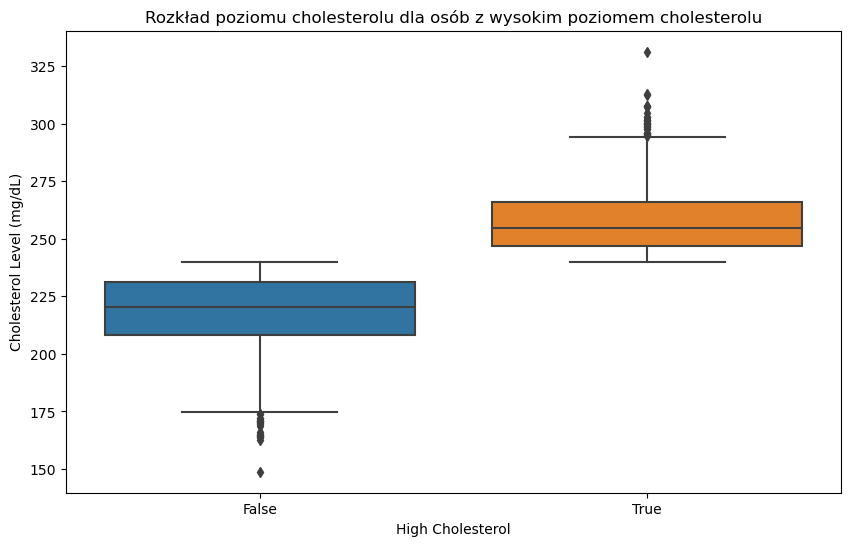

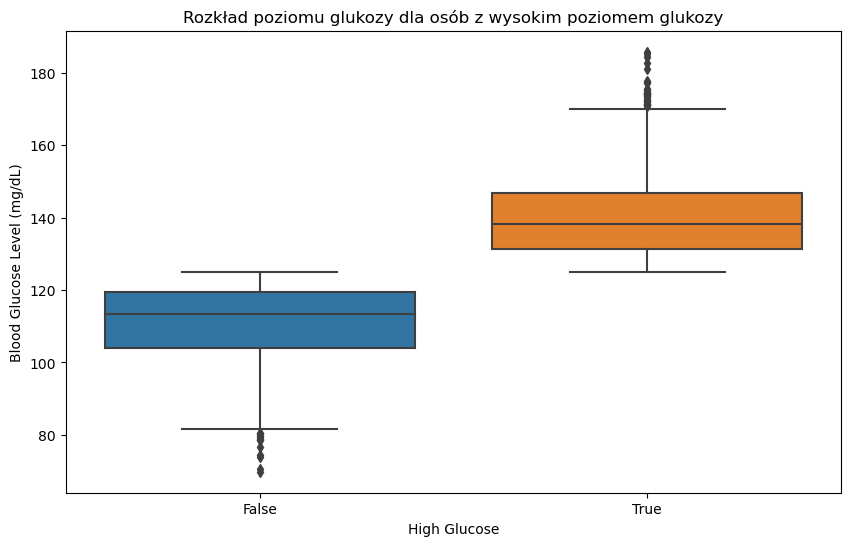

In [83]:
# Wizualizacja osób z wysokim poziomem cholesterolu i glukozy

# Wizualizacja rozkładu cholesterolu dla osób z wysokim poziomem cholesterolu
plt.figure(figsize=(10, 6))  # Tworzenie nowej figury o rozmiarze 10x6 cali
sns.boxplot(x='High Cholesterol', y='Cholesterol Level (mg/dL)', data=df)  # Tworzenie wykresu pudełkowego (boxplot), gdzie oś X to 'High Cholesterol', a oś Y to poziom cholesterolu
plt.title('Rozkład poziomu cholesterolu dla osób z wysokim poziomem cholesterolu')  # Ustawienie tytułu wykresu
plt.show()  # Wyświetlenie wykresu

# Wizualizacja rozkładu glukozy dla osób z wysokim poziomem glukozy
plt.figure(figsize=(10, 6))  # Tworzenie nowej figury o rozmiarze 10x6 cali
sns.boxplot(x='High Glucose', y='Blood Glucose Level (mg/dL)', data=df)  # Tworzenie wykresu pudełkowego (boxplot), gdzie oś X to 'High Glucose', a oś Y to poziom glukozy
plt.title('Rozkład poziomu glukozy dla osób z wysokim poziomem glukozy')  # Ustawienie tytułu wykresu
plt.show()  # Wyświetlenie wykresu


#### Analiza korelacji wskaźników zdrowotnych z wiekiem

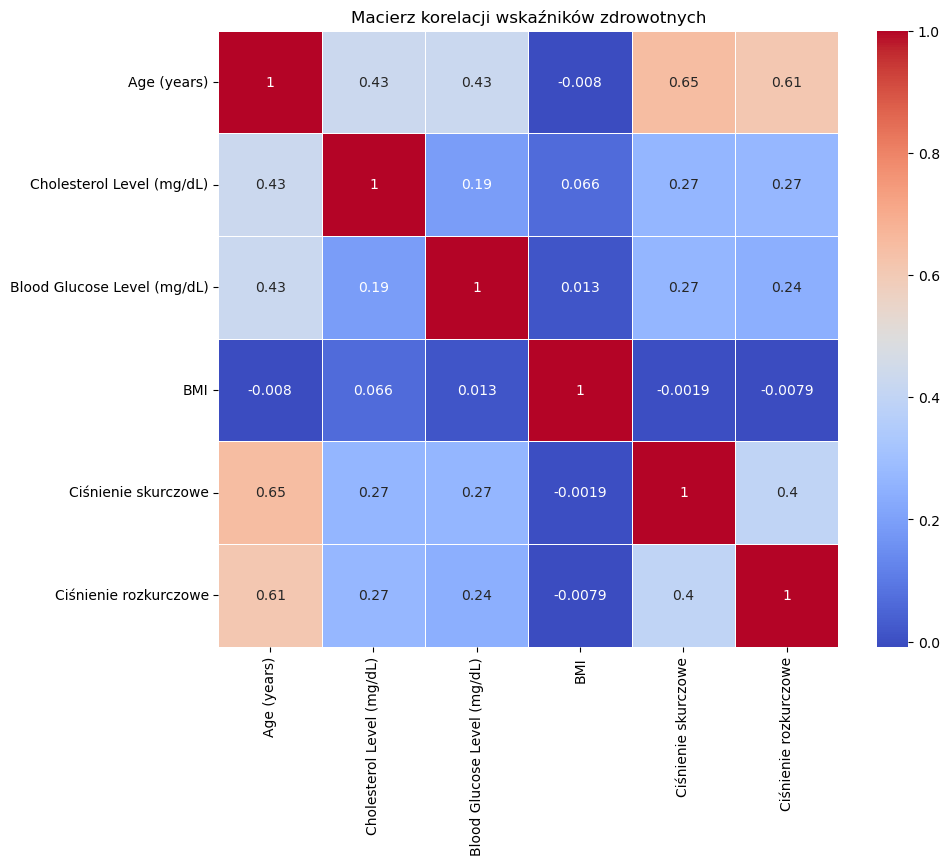

In [85]:
# Rozdzielenie ciśnienia krwi na ciśnienie skurczowe i rozkurczowe
df[['Ciśnienie skurczowe', 'Ciśnienie rozkurczowe']] = df['Blood Pressure (s/d)'].str.split('/', expand=True)  # Rozdziela wartości w kolumnie 'Blood Pressure (s/d)' na dwie osobne kolumny: 'Ciśnienie skurczowe' i 'Ciśnienie rozkurczowe'

# Konwersja nowych kolumn na wartości liczbowe
df['Ciśnienie skurczowe'] = pd.to_numeric(df['Ciśnienie skurczowe'], errors='coerce')  # Konwertuje kolumnę 'Ciśnienie skurczowe' na liczby; błędne wartości zamienia na NaN
df['Ciśnienie rozkurczowe'] = pd.to_numeric(df['Ciśnienie rozkurczowe'], errors='coerce')  # Konwertuje kolumnę 'Ciśnienie rozkurczowe' na liczby; błędne wartości zamienia na NaN

# Obliczenie macierzy korelacji dla wybranych wskaźników zdrowotnych (po korekcie ciśnienia krwi)
health_corr = df[['Age (years)', 'Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)', 'BMI', 'Ciśnienie skurczowe', 'Ciśnienie rozkurczowe']].corr()  # Oblicza korelację między wiekiem, poziomem cholesterolu, poziomem glukozy, BMI, ciśnieniem skurczowym i rozkurczowym

# Wizualizacja korelacji w formie heatmapy
plt.figure(figsize=(10, 8))  # Ustawia rozmiar wykresu na 10x8 cali
sns.heatmap(health_corr, annot=True, cmap='coolwarm', linewidths=0.5)  # Tworzy heatmapę korelacji z wartościami na komórkach (annot=True), z kolorem 'coolwarm' i szerokością linii 0.5
plt.title('Macierz korelacji wskaźników zdrowotnych')  # Ustawia tytuł wykresu
plt.show()  # Wyświetla wykres


#### Analiza wskaźników zdrowotnych w kontekście płci

        Cholesterol Level (mg/dL)  Blood Glucose Level (mg/dL)    BMI  \
Gender                                                                  
Female                     234.15                       126.51  24.93   
Male                       233.90                       126.80  26.18   

        Ciśnienie skurczowe  Ciśnienie rozkurczowe  
Gender                                              
Female               146.08                  95.45  
Male                 145.98                  95.68  


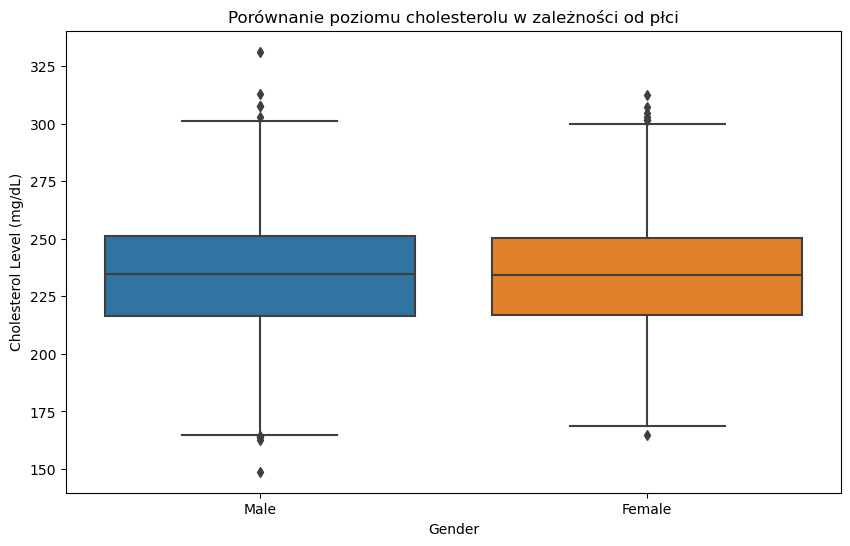

In [87]:
# Grupowanie danych według płci i obliczenie średnich wskaźników zdrowotnych, a następnie zaokrąglenie wyników
gender_grouped = df.groupby('Gender').mean(numeric_only=True)[['Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)', 'BMI', 'Ciśnienie skurczowe', 'Ciśnienie rozkurczowe']].round(2) # Grupowanie danych według kolumny 'Gender', obliczenie średnich wartości dla cholesterolu, glukozy, BMI, ciśnienia skurczowego i rozkurczowego

print(gender_grouped)  # Wyświetlenie tabeli ze średnimi wskaźnikami zdrowotnymi dla mężczyzn i kobiet

# Wizualizacja porównania poziomu cholesterolu w kontekście płci
plt.figure(figsize=(10, 6))  # Tworzenie figury o rozmiarze 10x6 cali
sns.boxplot(x='Gender', y='Cholesterol Level (mg/dL)', data=df)  # Tworzenie wykresu pudełkowego dla poziomu cholesterolu, grupowanego według płci
plt.title('Porównanie poziomu cholesterolu w zależności od płci')  # Dodanie tytułu do wykresu
plt.show()  # Wyświetlenie wykresu


#### Wnioski

#### Analiza trendów zdrowotnych w grupach wiekowych

           Cholesterol Level (mg/dL)  Blood Glucose Level (mg/dL)    BMI  \
age_group                                                                  
0-18                          214.58                       115.19  24.61   
19-35                         219.78                       116.53  25.78   
36-50                         229.60                       123.00  25.52   
51-65                         236.14                       127.72  25.35   
65+                           246.43                       135.98  25.59   

           Ciśnienie skurczowe  Ciśnienie rozkurczowe  
age_group                                              
0-18                    129.00                  85.54  
19-35                   132.91                  87.68  
36-50                   140.82                  92.49  
51-65                   147.44                  97.10  
65+                     158.51                 102.59  


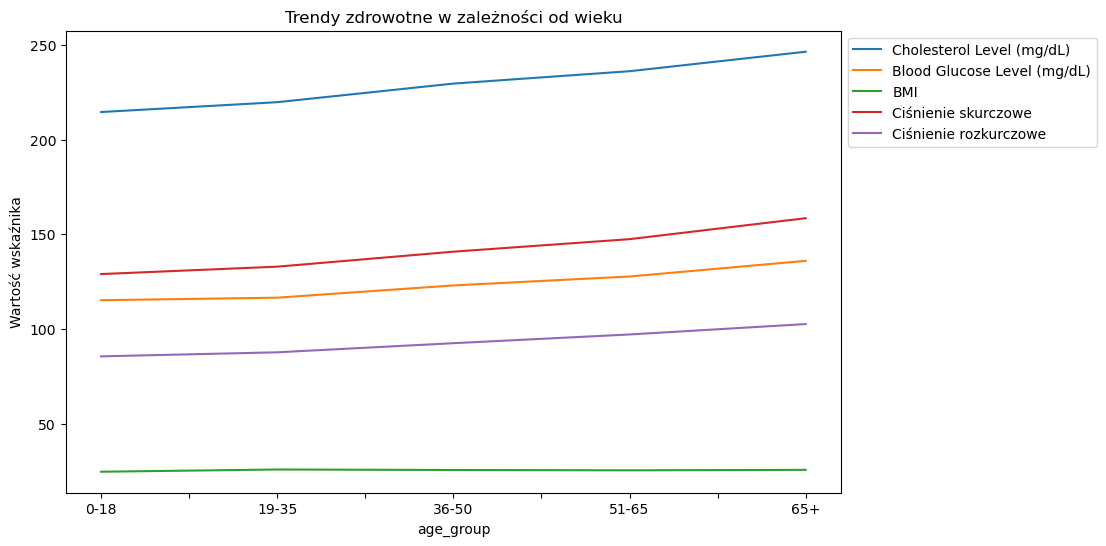

In [89]:
# Obliczanie średnich wskaźników zdrowotnych dla grup wiekowych, zaokrąglonych do 2 miejsc po przecinku
# Grupowanie danych według grup wiekowych ('age_group') i obliczanie średnich wskaźników zdrowotnych
age_group_trends = df.groupby('age_group').mean(numeric_only=True)[['Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)', 'BMI', 'Ciśnienie skurczowe', 'Ciśnienie rozkurczowe']].round(2)

# df.groupby('age_group') - grupowanie danych według kolumny 'age_group', która zawiera podział na grupy wiekowe
# .mean(numeric_only=True) - obliczanie średnich wartości dla wskaźników zdrowotnych, uwzględniając tylko kolumny numeryczne
# [['Cholesterol Level (mg/dL)', 'Blood Glucose Level (mg/dL)', 'BMI', 'Ciśnienie skurczowe', 'Ciśnienie rozkurczowe']] - wybór kolumn, dla których obliczamy średnie
# .round(2) - zaokrąglenie wyników do dwóch miejsc po przecinku

# Wyświetlenie zaokrąglonych wyników
print(age_group_trends)

# Wizualizacja trendów zdrowotnych z legendą poza wykresem
ax = age_group_trends.plot(kind='line', figsize=(10, 6))  # Tworzenie wykresu liniowego dla średnich wskaźników zdrowotnych w grupach wiekowych, ustawienie rozmiaru figury na 10x6 cali
plt.title('Trendy zdrowotne w zależności od wieku')  # Ustawienie tytułu wykresu
plt.ylabel('Wartość wskaźnika')  # Ustawienie etykiety osi Y (Wartość wskaźnika zdrowotnego)

# Przesunięcie legendy na prawy górny róg, poza wykres
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Ustawienie legendy poza obszarem wykresu, w prawym górnym rogu (upper left poza wykresem)

# Wyświetlenie wykresu
plt.show()  # Wyświetlenie gotowego wykresu


#### Analiza wielokryterialna zdrowia (BMI, cholesterol, glukoza)

Liczba osób o wysokim ryzyku zdrowotnym: 132


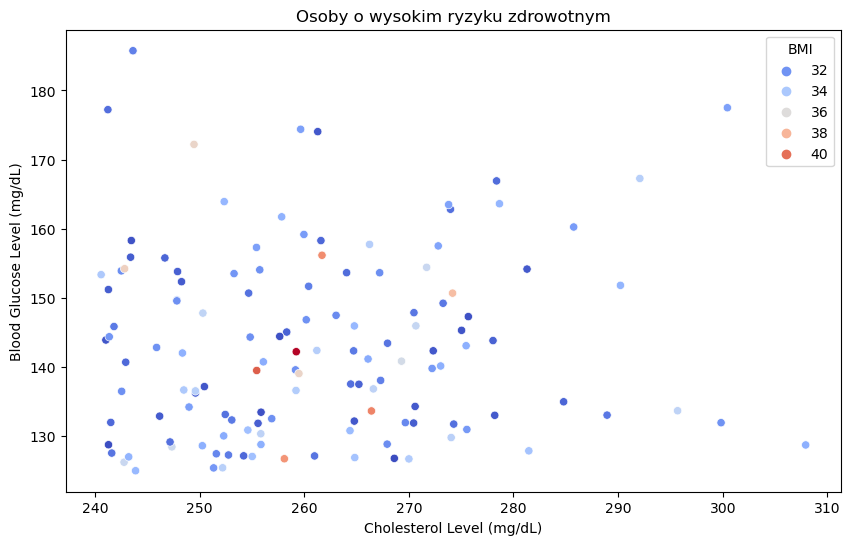

In [91]:
# Definiowanie osób o wysokim ryzyku zdrowotnym
high_risk = df[(df['BMI'] > 30) & (df['Cholesterol Level (mg/dL)'] > 240) & (df['Blood Glucose Level (mg/dL)'] > 125)]
# Filtruje dane, aby zidentyfikować osoby, które mają wskaźnik BMI powyżej 30, poziom cholesterolu powyżej 240 mg/dL i poziom glukozy powyżej 125 mg/dL
# Są to osoby o wysokim ryzyku zdrowotnym

# Wyświetlenie liczby osób o wysokim ryzyku zdrowotnym
print(f'Liczba osób o wysokim ryzyku zdrowotnym: {len(high_risk)}')  # Wyświetla liczbę osób spełniających kryteria wysokiego ryzyka zdrowotnego

# Wizualizacja osób o wysokim ryzyku zdrowotnym
plt.figure(figsize=(10, 6))  # Tworzenie nowej figury o rozmiarze 10x6 cali
sns.scatterplot(x='Cholesterol Level (mg/dL)', y='Blood Glucose Level (mg/dL)', hue='BMI', data=high_risk, palette='coolwarm')  
# Tworzenie wykresu punktowego (scatterplot), gdzie oś X reprezentuje poziom cholesterolu, a oś Y poziom glukozy.
# Kolor punktów (hue) reprezentuje wartości BMI, a paleta 'coolwarm' zmienia kolory na podstawie wartości BMI.
plt.title('Osoby o wysokim ryzyku zdrowotnym')  # Ustawienie tytułu wykresu
plt.show()  # Wyświetlenie wykresu
